# **CNN đầy đủ**

# **CIFAR10 - CNN**

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
cifar10_data = cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10_data

170498071/170498071 [==============================] - 13s 0us/step


In [2]:
print("x train : ", X_train.shape)
print("x test : ", X_test.shape)
print("y train : ", y_train.shape)
print("y test : ", y_test.shape)

x train :  (50000, 32, 32, 3)
x test :  (10000, 32, 32, 3)
y train :  (50000, 1)
y test :  (10000, 1)


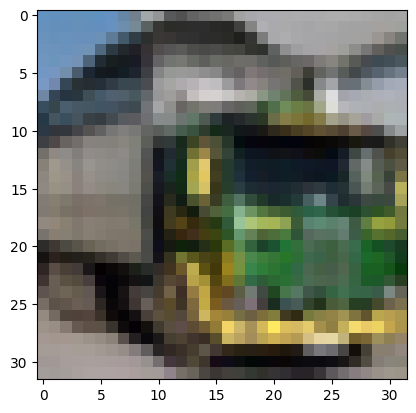

In [ ]:

import matplotlib.pyplot as plt
image = x_train[14]
plt.imshow(image,cmap=plt.cm.binary)
plt.show()


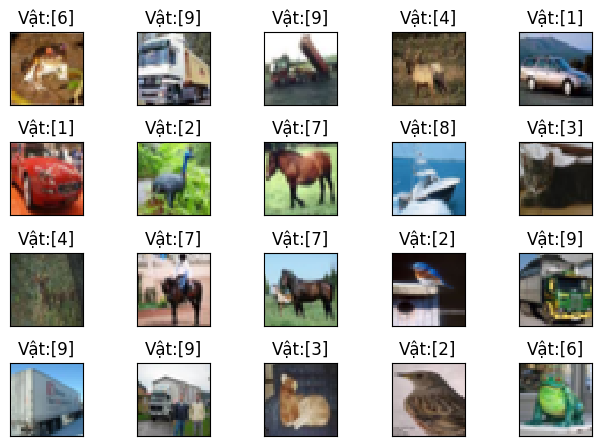

In [ ]:

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],
             interpolation = 'none')
  plt.title('Vật:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [3]:
from keras.utils import to_categorical 

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape
y_test.shape

(10000, 10)

# **CNN**

In [4]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

In [5]:
model = Sequential()
#1 
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
#2 
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
#3 
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))

# **ANN**

In [6]:
from keras.backend import categorical_crossentropy
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                        

In [7]:
train = model.fit(X_train,y_train,batch_size=256,epochs=100,verbose=1)

Epoch 1/100
196/196 [==============================] - 13s 17ms/step - loss: 5.8797 - accuracy: 0.1743
Epoch 2/100
196/196 [==============================] - 3s 15ms/step - loss: 1.8513 - accuracy: 0.3168
Epoch 3/100
196/196 [==============================] - 3s 15ms/step - loss: 1.7071 - accuracy: 0.3672
Epoch 4/100
196/196 [==============================] - 3s 15ms/step - loss: 1.6036 - accuracy: 0.4089
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5292 - accuracy: 0.4395
Epoch 6/100
196/196 [==============================] - 3s 18ms/step - loss: 1.4532 - accuracy: 0.4682
Epoch 7/100
196/196 [==============================] - 3s 15ms/step - loss: 1.4021 - accuracy: 0.4912
Epoch 8/100
196/196 [==============================] - 3s 15ms/step - loss: 1.3495 - accuracy: 0.5150
Epoch 9/100
196/196 [==============================] - 3s 15ms/step - loss: 1.2975 - accuracy: 0.5350
Epoch 10/100
196/196 [==============================] - 3s 16ms/step - loss: 1.24

In [ ]:
model.save('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/files/week11_cifar10_CNN.h5')

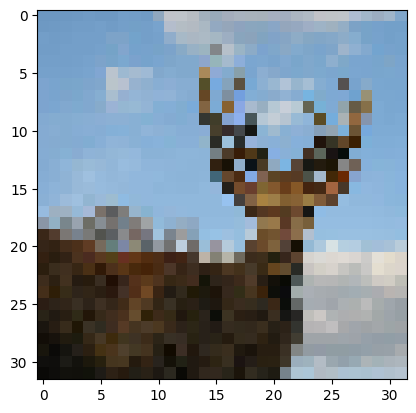

In [14]:
# tải ảnh lên kiểm tra 
import matplotlib.pyplot as plt
from keras.utils import load_img
img = load_img('deer1.jpeg',target_size=(32,32))
plt.imshow(img)

In [16]:
from tensorflow.keras.utils import img_to_array
import numpy as np

img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

InvalidArgumentError: ignored

In [ ]:

#cifar10 kh cần reshape do dữ liệu data
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [ ]:

from keras.utils import to_categorical #ONE HOT ENCODING
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_train,10)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Normalization, LeakyReLU
from keras.optimizers import Adam


In [ ]:

model.save('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/files/model_CNN_cifar10.h5')

In [ ]:
model.save('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/files/week11_cifar10_CNN.h5')

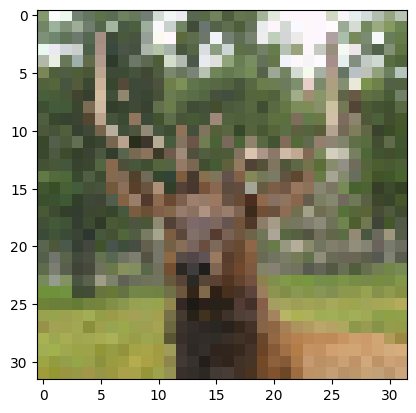

In [ ]:
# tải ảnh lên kiểm tra 

from keras.utils import load_img
img = load_img('/content/drive/MyDrive/A_HOC TAP/Nam 4, Hoc ky 2/Artificial Intelligence/Code_AI/files/images/image4predict/deer2.jpeg',target_size=(32,32))
plt.imshow(img)

In [ ]:
# X_pred = img.reshape(1,32*32*3)
# X_pred = X_pred.astype('float32')/255
# y_pred = model.predict(X_pred)
# print(y_pred)
print(img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F9CA8366DF0>


In [ ]:
from tensorflow.keras.utils import img_to_array
import numpy as np

img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 18ms/step


array([4])